## Inicialización

In [150]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from math import factorial
import scipy.stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [ ]:
# Cargar los archivos de datos en diferentes DataFrames
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border: 1px solid #cce;">

### Calls

Data y modificaciones

</div>

In [152]:
display(calls)
print("\n\n\n",calls.describe(),"\n\n\n")
print(calls.info())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37





              user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [153]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls["duration"] = np.ceil(calls["duration"])
calls['duration'] = calls['duration'].astype(int)
display(calls,"\n\n\n")
print(calls.info())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


'\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB
None


<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border: 1px solid #cce;">

### Internet

Data y modificaciones

</div>

In [154]:
display(internet)
print("\n\n\n",internet.describe(),"\n\n\n")
print(internet.info())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00





              user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [155]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['mb_used'] = pd.to_numeric(internet['mb_used'], errors='coerce')
display(internet,"\n\n\n")
print(internet.info())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


'\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border: 1px solid #cce;">

### Messages

Data y modificaciones

</div>

In [156]:
display(messages)
print("\n\n\n",messages.describe(),"\n\n\n")
print(messages.info())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24





             user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [157]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
display(messages,"\n\n\n")
print(messages.info())

#ceil (siguiente entero)
#floor (entero menor)
#round (convencional)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


'\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border: 1px solid #cce;">

### Plans

Data y modificaciones

</div>

In [158]:
display(plans)
print("\n\n\n",plans.describe(),"\n\n\n")
print(plans.info())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate





        messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count         2.000000     2.00000         2.000000        2.000000  
mean         45.000000     8.50000         0.020000        0.020000  
std          35.355339     2.12132         0.014142        0.014142  
min          20.000000     7.00000         0.010000        0.010000  
25%          32.500000  

<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border: 1px solid #cce;">

### Users

Data y modificaciones

</div>

In [159]:
display(users)
print("\n\n\n",users.describe(),"\n\n\n")
print(users.info())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN





            user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [160]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
display(users,"\n\n\n")
print(users.info())

#ceil (siguiente entero)
#floor (entero menor)
#round (convencional)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


'\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


## Tarifas

In [ ]:
# Imprimir la información general/resumida sobre el DataFrame de las tarifas
display(plans) 
display(plans.info())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [ ]:
# Imprimir una muestra de los datos para las tarifas
muestra_plans = users.groupby('plan').sample(n=5, random_state=42)
display(muestra_plans)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
410,1410,Wendell,Lloyd,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-06,surf,NaT
171,1171,Devin,Wilkinson,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-01-27,surf,NaT
168,1168,Shay,Weaver,58,"Milwaukee-Waukesha, WI MSA",2018-12-13,surf,NaT
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,NaT
132,1132,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-14,ultimate,NaT
250,1250,Milan,Sellers,57,"Houston-The Woodlands-Sugar Land, TX MSA",2018-04-03,ultimate,NaT
144,1144,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,ultimate,NaT
296,1296,Weston,Conley,36,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-10-20,ultimate,2018-12-18
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-09,ultimate,NaT


**Observaciones:**

Se puede apreciar 2 planes con sus beneficios al ser contratados. Se lleva a cabo una extracción de los datos de "Tarifa" directamente de "User" y no de "Plans" ya que este DF posee registros muy específicos sin mucha dilatación.
Por otro lado, no fue necesario llevar a cabo alguna modificación dentro de las tarifas, los datos se encuentran "estandarizados".

## Usuarios/as

In [ ]:
# Imprimir la información general/resumida sobre el DataFrame de usuarios
display(users) 
print(users.info()) 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


In [ ]:
# Imprimir una muestra de datos para usuarios
muestra_users = users.sample(n=20, random_state=42)
display(muestra_users) 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaT
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaT
374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaT
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaT
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaT
394,1394,Alejandro,Carver,28,"Stockton, CA MSA",2018-01-16,surf,NaT
377,1377,Vallie,Conway,18,"Rochester, NY MSA",2018-03-27,surf,NaT
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaT
68,1068,Marcel,Jimenez,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,NaT
450,1450,Errol,Marquez,67,"Bakersfield, CA MSA",2018-06-16,ultimate,NaT


**Observaciones:**

DF contiene datos de 500 clientes. Cada cliente cuenta con su respectivo plan, fechas de contratación y de cancelación, además posee datos demográficos como lo son la edad y su lugar de residencia.

Los datos fueron modificados al inicio buscando arreglar el formato de "Chrun_Date" el cual se encontraba como una cadena. Se modifica a fecha con el ánimo de generar dos columnas, una para año y mes (Se llevará a cabo más adelante en el proyecto)

## Llamadas

In [ ]:
# Imprimir la información general/resumida sobre el DataFrame de las llamada
display(calls)s
print(users.info())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


In [ ]:
# Imprimir una muestra de datos para las llamadas
muestra_calls = calls.sample(n=20, random_state=42)
display(muestra_calls)

,id,user_id,call_date,duration
52288,1187_481,1187,2018-12-12,0
30634,1114_568,1114,2018-10-21,2
54228,1196_106,1196,2018-07-23,6
110372,1389_454,1389,2018-05-12,12
109600,1386_60,1386,2018-11-24,0
87094,1320_763,1320,2018-06-23,4
67527,1242_23,1242,2018-11-15,14
9557,1042_494,1042,2018-11-05,8
104970,1369_55,1369,2018-12-28,0
124419,1439_287,1439,2018-08-16,9


**Observaciones:**

DF contiene información de 137.735 llamadas. Cada llamada cuenta con un ID único, partiendo por el ID del cliente, y una fecha de llamada.

Los datos fueron modificados al inicio buscando arreglar el formato de "Call_Date" el cual se encontraba como una cadena. Se modifica a fecha con el ánimo de generar dos columnas, una para año y mes (Se llevará a cabo más adelante en el proyecto).

### Enriquecer los datos

In [ ]:
# Extraer el mes y año de la 'call date' y agregarlo como una nueva columna
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

display(calls)

,id,user_id,call_date,duration,month,year
0,1000_93,1000,2018-12-27,9,12,2018
1,1000_145,1000,2018-12-27,14,12,2018
2,1000_247,1000,2018-12-27,15,12,2018
3,1000_309,1000,2018-12-28,6,12,2018
4,1000_380,1000,2018-12-30,5,12,2018
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11,2018
137731,1499_200,1499,2018-10-20,11,10,2018
137732,1499_201,1499,2018-09-21,9,9,2018
137733,1499_202,1499,2018-10-10,1,10,2018


## Mensajes

In [ ]:
# Imprimir la información general/resumida sobre el DataFrame de los mensajes
display(messages)
print(messages.info())


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [ ]:
# Imprimir una muestra de datos para los mensajes
muestra_messages = messages.sample(n=20, random_state=42)
display(muestra_messages)

,id,user_id,message_date
58331,1369_132,1369,2018-12-27
24196,1145_51,1145,2018-07-11
9284,1069_42,1069,2018-12-03
44214,1293_1181,1293,2018-10-06
57006,1362_72,1362,2018-05-25
65485,1421_70,1421,2018-12-21
10405,1076_916,1076,2018-11-23
36070,1237_91,1237,2018-09-02
31581,1196_64,1196,2018-06-27
15257,1101_314,1101,2018-12-16


**Observaciones:**

DF muestra 76.061 registros para los mensajes. Cada mensaje cuenta con con ID iniciando por el ID de usuario, además, cuenta con las fechas correspondientes. 

Los datos fueron modificados al inicio buscando arreglar el formato de "Message_Date" el cual se encontraba como una cadena. Se modifica a fecha con el ánimo de generar dos columnas, una para año y mes (Se llevará a cabo más adelante en el proyecto)

In [170]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

display(calls)

,id,user_id,call_date,duration,month,year
0,1000_93,1000,2018-12-27,9,12,2018
1,1000_145,1000,2018-12-27,14,12,2018
2,1000_247,1000,2018-12-27,15,12,2018
3,1000_309,1000,2018-12-28,6,12,2018
4,1000_380,1000,2018-12-30,5,12,2018
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11,2018
137731,1499_200,1499,2018-10-20,11,10,2018
137732,1499_201,1499,2018-09-21,9,9,2018
137733,1499_202,1499,2018-10-10,1,10,2018


## Internet

In [ ]:
# Imprimir la información general/resumida sobre el DataFrame de internet
display(internet)
print(internet.info())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [ ]:
# Imprimir una muestra de datos para el tráfico de internet
muestra_internet = internet.sample(n=20, random_state=45)
display(muestra_internet)



,id,user_id,session_date,mb_used
48094,1214_468,1214,2018-08-03,17.98
89094,1410_291,1410,2018-11-26,153.11
94478,1440_116,1440,2018-09-16,820.14
49587,1222_86,1222,2018-10-15,46.30
53010,1239_119,1239,2018-12-19,317.12
25743,1120_292,1120,2018-11-16,379.67
25113,1117_46,1117,2018-11-09,612.29
36177,1163_158,1163,2018-09-20,319.50
95436,1445_84,1445,2018-07-26,0.00
86944,1403_292,1403,2018-05-14,1024.40


**Observaciones:**

Para internet, el DF expone 104.528 registros, cada uno con ID único iniciando por el ID de de usuario. Se puede apreciar también que existen registros duplicados para la columna de ID de usuarios puesto que son varias sesiones que un usuario accede a MB extra.

Los datos fueron modificados al inicio buscando arreglar el formato de "Session_Date" el cual se encontraba como una cadena. Se modifica a fecha con el ánimo de generar dos columnas, una para año y mes (Se llevará a cabo más adelante en el proyecto)

In [186]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year

display(calls)

,id,user_id,call_date,duration,month,year
0,1000_93,1000,2018-12-27,9,12,2018
1,1000_145,1000,2018-12-27,14,12,2018
2,1000_247,1000,2018-12-27,15,12,2018
3,1000_309,1000,2018-12-28,6,12,2018
4,1000_380,1000,2018-12-30,5,12,2018
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11,2018
137731,1499_200,1499,2018-10-20,11,10,2018
137732,1499_201,1499,2018-09-21,9,9,2018
137733,1499_202,1499,2018-10-10,1,10,2018


## Estudiar las condiciones de las tarifas

In [200]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

In [ ]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

In [ ]:
# Calcular el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_count = calls.groupby(['user_id', 'year', 'month']).agg({'id': 'count'}).reset_index()
calls_count = calls_count.rename(columns={'id': 'calls_count'})


calls_count.head() 



,user_id,year,month,calls_count
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64


In [ ]:
# Calcular la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_used = calls.groupby(['user_id', 'year', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_used = minutes_used.rename(columns={'duration': 'minutes_used'}) 


minutes_used.head()

,user_id,year,month,minutes_used
0,1000,2018,12,124
1,1001,2018,8,182
2,1001,2018,9,315
3,1001,2018,10,393
4,1001,2018,11,426


In [ ]:
# Mostrar las primeras filas del DataFrame resultante
messages_count = messages.groupby(['user_id', 'year', 'month']).agg({'id': 'count'}).reset_index()
messages_count = messages_count.rename(columns={'id': 'messages_count'})

messages_count.head()

,user_id,year,month,messages_count
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36


In [ ]:
# Calcular el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_volume = internet.groupby(['user_id', 'year', 'month']).agg({'mb_used': 'sum'}).reset_index()

internet_volume = internet_volume.rename(columns={'mb_used': 'mb_used_total'})

internet_volume.head() 



,user_id,year,month,mb_used_total
0,1000,2018,12,1901.47
1,1001,2018,8,6919.15
2,1001,2018,9,13314.82
3,1001,2018,10,22330.49
4,1001,2018,11,18504.30


In [ ]:
# Fusionar los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
data_merge = (calls_count
               .merge(minutes_used, on=['user_id', 'year', 'month'], how='outer')
               .merge(messages_count, on=['user_id', 'year', 'month'], how='outer')
               .merge(internet_volume, on=['user_id', 'year', 'month'], how='outer')
              )

data_merge = data_merge.merge(users[['user_id', 'plan']], on='user_id', how='left')
data_merge = data_merge.fillna(0)
data_merge['gb_used_total'] = np.ceil(data_merge['mb_used_total'] / 1024)

data_merge.head() 

,user_id,year,month,calls_count,minutes_used,messages_count,mb_used_total,plan,gb_used_total
0,1000,2018,12,16.0,124.0,11.0,1901.47,ultimate,2.0
1,1001,2018,8,27.0,182.0,30.0,6919.15,surf,7.0
2,1001,2018,9,49.0,315.0,44.0,13314.82,surf,14.0
3,1001,2018,10,65.0,393.0,53.0,22330.49,surf,22.0
4,1001,2018,11,64.0,426.0,36.0,18504.30,surf,19.0


In [ ]:
# Calcular el ingreso mensual para cada usuario
def calculate_month_rev(row):
    plan = plans[plans['plan_name'] == row['plan']].iloc[0]
    
    call_cost = max(row['minutes_used'] - plan['minutes_included'], 0) * plan['usd_per_minute']
    
    message_cost = max(row['messages_count'] - plan['messages_included'], 0) * plan['usd_per_message']
    
    gb_used = np.ceil(row['mb_used_total'] / 1024)
    gb_included = np.ceil(plan['mb_per_month_included'] / 1024)
    internet_cost = max(gb_used - gb_included, 0) * plan['usd_per_gb']
    total_cost = call_cost + message_cost + internet_cost + plan['usd_monthly_pay']
    
    return total_cost

data_merge['monthly_revenue'] = data_merge.apply(calculate_month_rev, axis=1)

data_merge['monthly_revenue'] = data_merge['monthly_revenue'].round(2)

display(data_merge.head()) 



,user_id,year,month,calls_count,minutes_used,messages_count,mb_used_total,plan,gb_used_total,monthly_revenue
0,1000,2018,12,16.0,124.0,11.0,1901.47,ultimate,2.0,70.00
1,1001,2018,8,27.0,182.0,30.0,6919.15,surf,7.0,20.00
2,1001,2018,9,49.0,315.0,44.0,13314.82,surf,14.0,20.00
3,1001,2018,10,65.0,393.0,53.0,22330.49,surf,22.0,90.09
4,1001,2018,11,64.0,426.0,36.0,18504.30,surf,19.0,60.00


## Estudiar el comportamiento de usuario

### Llamadas

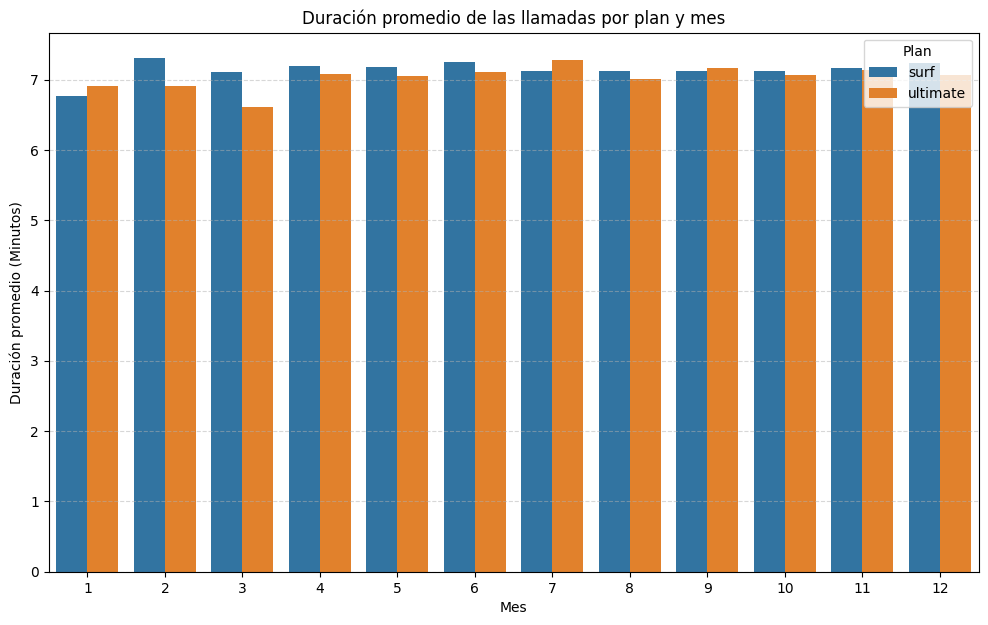

In [ ]:
# Comparar la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls['month'] = pd.to_datetime(calls['call_date']).dt.month

avg_duration = (calls.merge(users, on='user_id', how='left')
                .groupby(['month', 'plan'])['duration']
                .mean()
                .reset_index())

plt.figure(figsize=(12, 7))
sns.barplot(data=avg_duration, x='month', y='duration', hue='plan')
plt.title('Duración promedio de las llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (Minutos)')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




La gráfica expone el promedio de duración de las llamadas según el plan. Se puede observar variaciones durante la duración de las llamadas para cada mes con respecto al plan. 

Es importante tener presente que el promedio de duración de las llamadas parecen ser similares entre los planes.

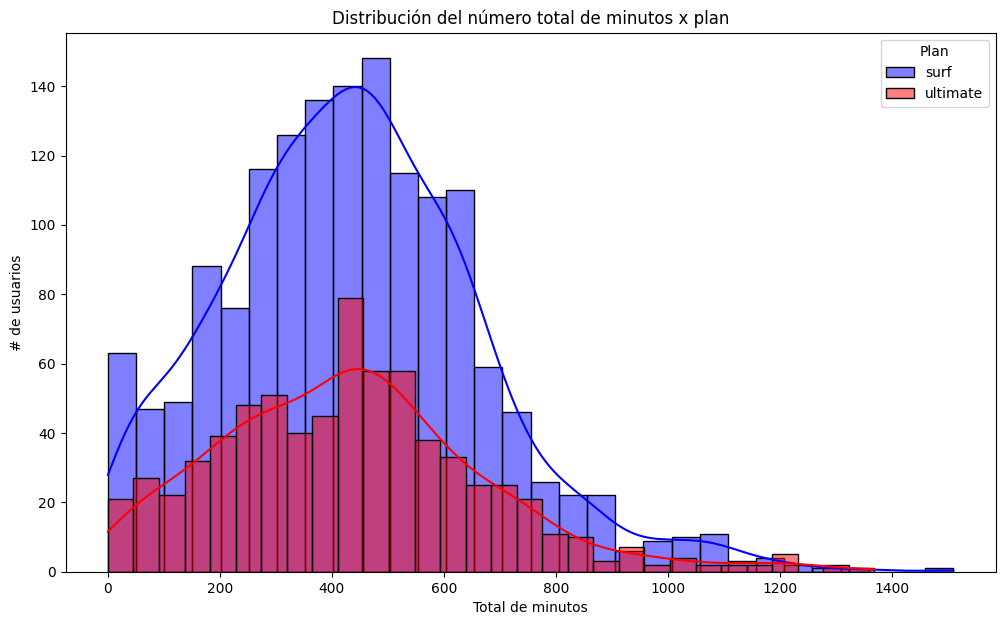

In [ ]:
# Comparar el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
tot_minutes = (calls.merge(users, on='user_id', how='left')
                 .groupby(['user_id', 'month', 'plan'])['duration']
                 .sum()
                 .reset_index())

plt.figure(figsize=(12, 7))
for plan, color in [('surf', 'blue'), ('ultimate', 'red')]:
    sns.histplot(tot_minutes[tot_minutes['plan'] == plan]['duration'], kde=True, label=plan, bins=30, alpha=0.5, color=color)

plt.title('Distribución del número total de minutos x plan')
plt.xlabel('Total de minutos')
plt.ylabel('# de usuarios')
plt.legend(title='Plan')
plt.show() 


La gráfica muestra la distribución del total de minutos usados por los usuarios cada mes, según el plan.

Se aprecia que el plan Surf suele tener una distribución más amplia con respecto a los minutos consumidos (Pico de alrededor de 500 minutos).

El plan Ultimate muestran una distribución más consistente, con un pico alrededor de los 500 minutos.

In [ ]:
# Calcular la media y la varianza de la duración mensual de llamadas.
stats_duration = tot_minutes.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()

display(stats_duration) 


,plan,mean,var
0,surf,436.519741,52571.063243
1,ultimate,434.676017,56573.632247


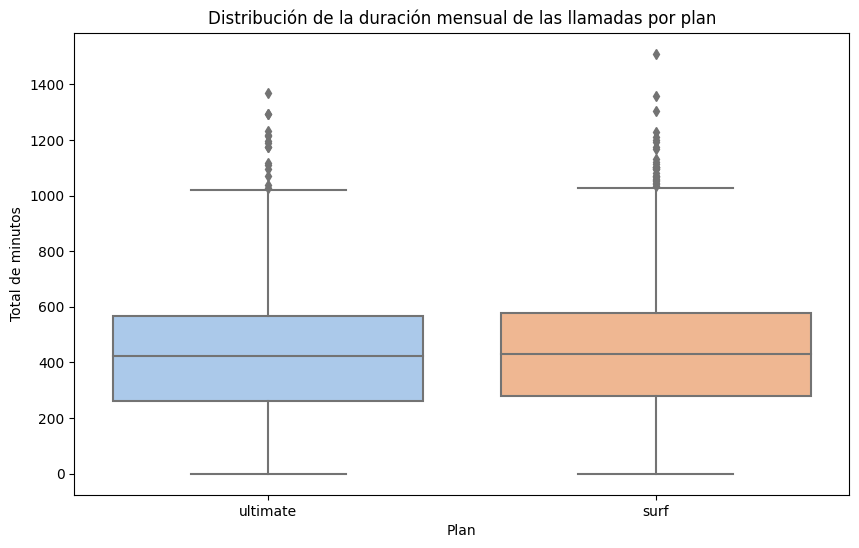

In [ ]:
#Trazar un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize = (10, 6))
sns.boxplot(data = tot_minutes, x='plan', y='duration', palette='pastel')
plt.title('Distribución de la duración mensual de las llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Total de minutos')
plt.show() # 


La gráfica de cajas y bigotes exponen la distribución mensual con respecto a la duración de las llamadas para ambos planes.

Se puede observar que la media es bastante similar en ambas, la diferencia es bastante baja.

Con respecto a la distribución de los datos, se puede entender que no tiene una distribución normal dado a los outliers que ambos presentan. Surf posee outliers mucho más alejados del cuartil.

### Mensajes

,user_id,month,plan,total_messages
0,1000,12,ultimate,11
1,1001,8,surf,30
2,1001,9,surf,44
3,1001,10,surf,53
4,1001,11,surf,36
...,...,...,...,...
1801,1496,9,surf,21
1802,1496,10,surf,18
1803,1496,11,surf,13
1804,1496,12,surf,11


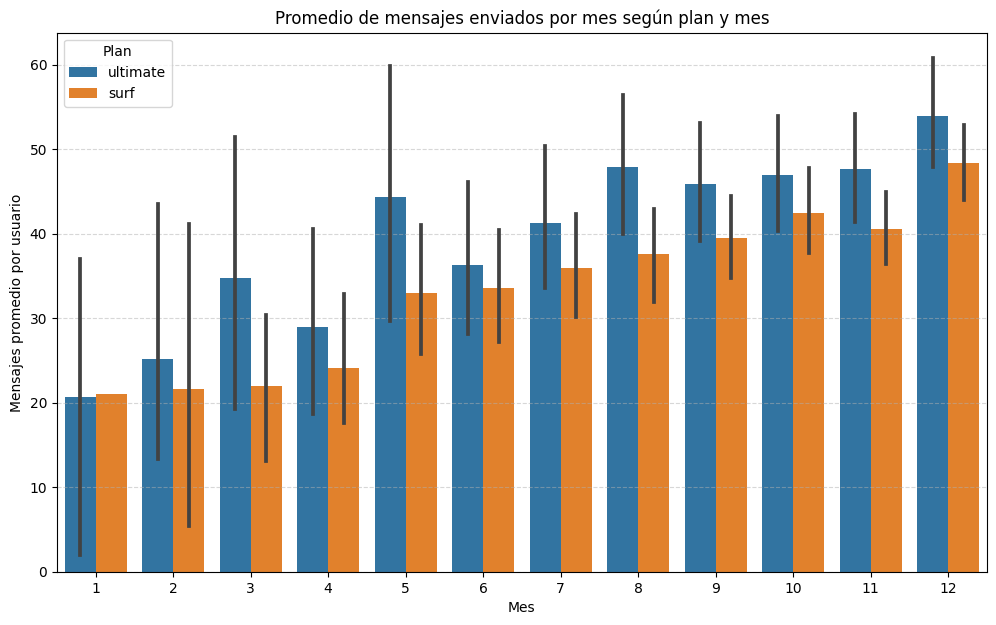

In [ ]:
# Agrupación mensual de mensajes enviados por usuario para comparar el comportamiento entre planes
messages['month'] = pd.to_datetime(messages['message_date']).dt.month

total_messages = (messages.merge(users, on='user_id', how='left')
                  .groupby(['user_id', 'month', 'plan'])['id']
                  .count()
                  .reset_index()
                  .rename(columns={'id': 'total_messages'}))

display(total_messages)


plt.figure(figsize=(12, 7))
sns.barplot(data=total_messages, x='month', y='total_messages', hue='plan')
plt.title('Promedio de mensajes enviados por mes según plan y mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes promedio por usuario')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


La gráfica expone el promedio de mensajes de cada mes según el plan. 

Se puede observar variaciones bastante significativas con respecto a los planes, pues el plan Ultimate muestra tener una mayor tendencia de consumo promedio de mensajes siendo superior en 11 de 12 meses.

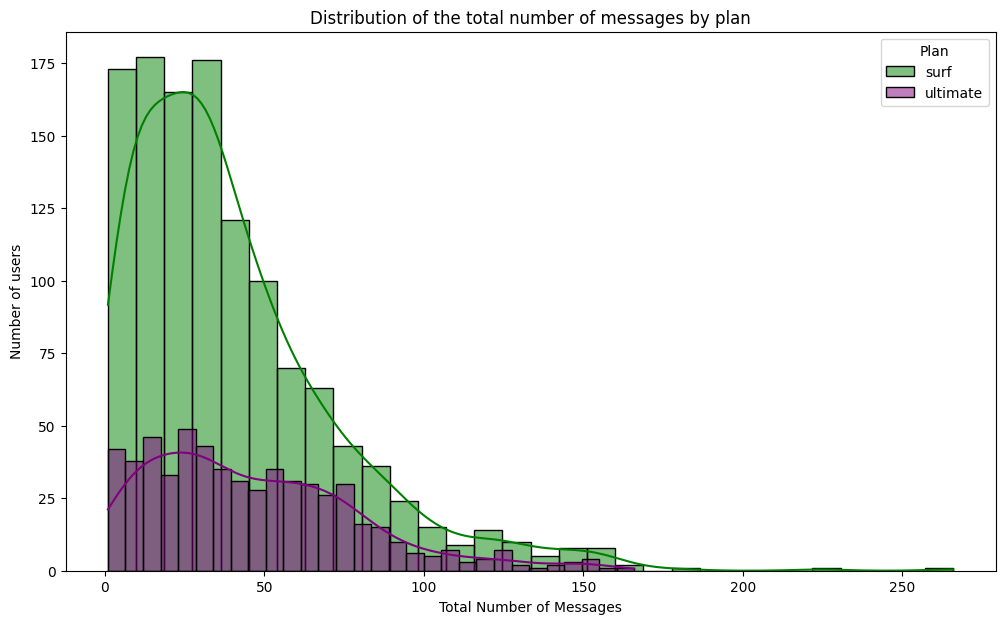

In [ ]:
# Comparar la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(12, 7))
for plan, color in [('surf', 'green'), ('ultimate', 'purple')]:
    sns.histplot(total_messages[total_messages['plan'] == plan]['total_messages'], kde=True, label=plan, bins=30, alpha=0.5, color=color)

plt.title('Distribution of the total number of messages by plan')
plt.xlabel('Total Number of Messages')
plt.ylabel('Number of users')
plt.legend(title='Plan')
plt.show() 


La gráfica muestra la distribución del total de mensajes enviados por los usuarios cada mes, según el plan.

Se aprecia que, la mayoria de usarios en ambos planes, suelen enviar menos de 100 mensajes al mes.

Para ambos planes, se puede observar una concentración en un rango inferior de mensajes, aunque el plan Ultimate parece tener una distribución mayor.

In [222]:
message_stats = total_messages.groupby('plan')['total_messages'].agg(['mean', 'var']).reset_index()

display(message_stats)

,plan,mean,var
0,surf,40.109656,1091.344231
1,ultimate,46.296233,1085.183108


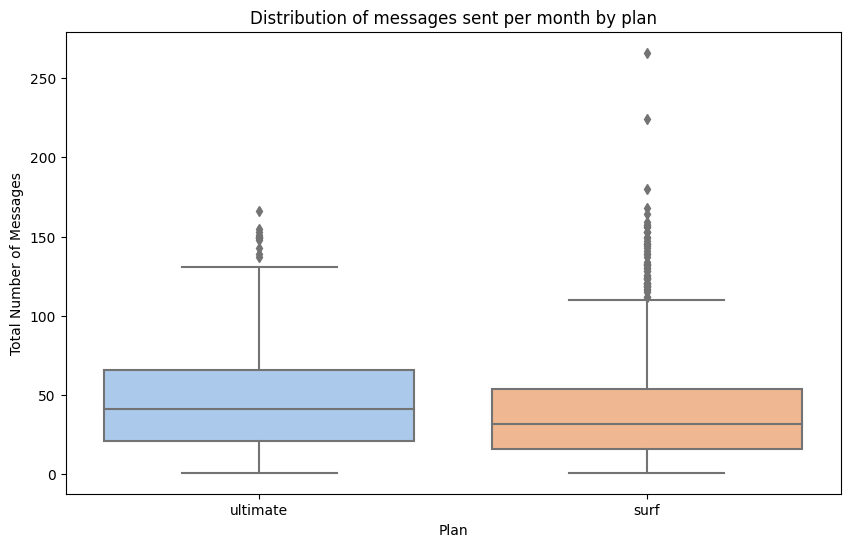

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_messages, x='plan', y='total_messages', palette='pastel')
plt.title('Distribution of messages sent per month by plan')
plt.xlabel('Plan')
plt.ylabel('Total Number of Messages')
plt.show()

La gráfica de cajas y bigotes exponen la distribución mensual con respecto a la cantidad de los mensajes para ambos planes.

Se puede observar que la media es bastante similar en ambas, la diferencia es bastante baja.

Con respecto a la distribución de los datos, se puede entender que no tiene una distribución normal dado a los outliers que ambos presentan. Surf posee outliers mucho más alejados del cuartil.

### Internet

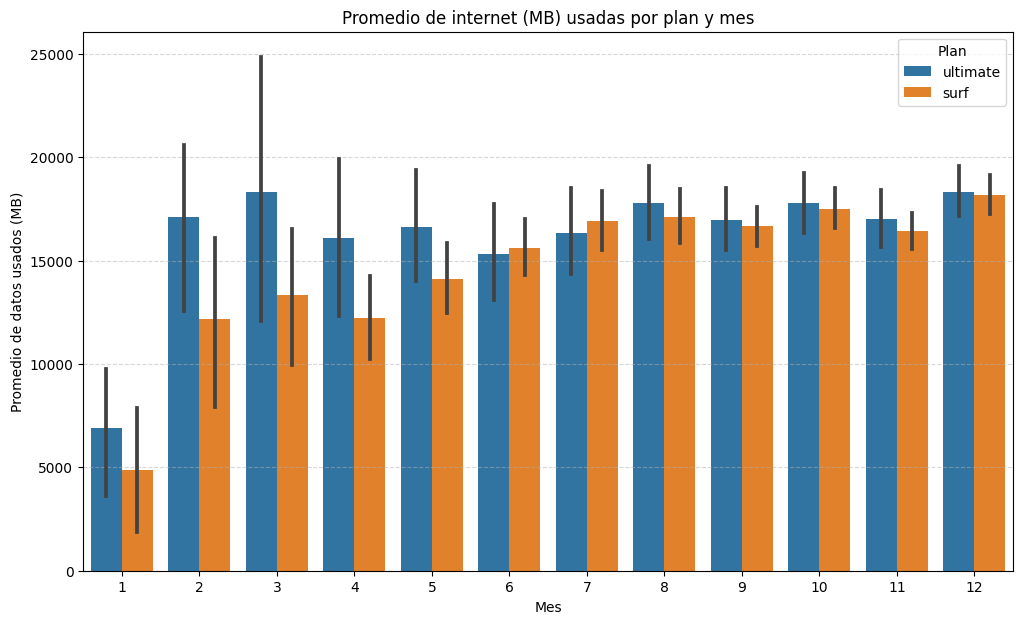

In [ ]:
# Cálculo del volumen total de datos móviles consumidos por usuario y mes, segmentado por tipo de plan

total_data_used = (internet.merge(users, on='user_id', how='left')
                   .groupby(['user_id', 'month', 'plan'])['mb_used']
                   .sum()
                   .reset_index()
                   .rename(columns={'mb_used': 'total_mb_used'}))

plt.figure(figsize = (12, 7))
sns.barplot(data = total_data_used, x='month', y='total_mb_used', hue='plan')
plt.title('Promedio de internet (MB) usadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de datos usados (MB)')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

La gráfica expone el promedio de MB empleados según mes y el plan. 

Se puede observar variaciones bastante significativas principalmente para los primeros 5 meses del año. Cómo primera observación, se puede determinar que el consumo de Ultimate es dominante en la mayor parte del año, la dominancia se pierde para los meses Junio y Julio, Surf presenta un mayor consumo (moderado con respecto a ultimate).

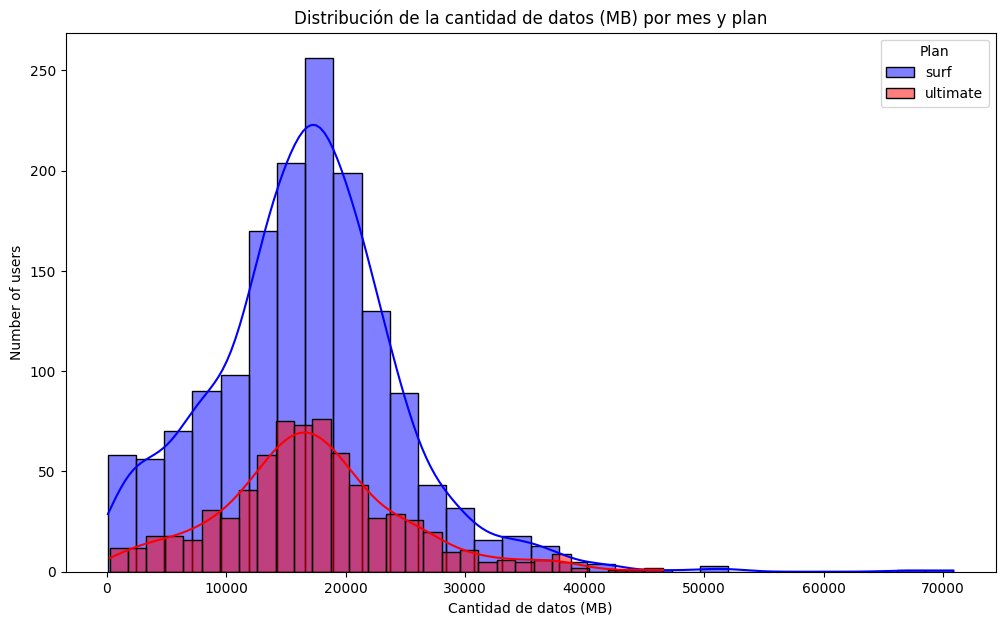

In [41]:
plt.figure(figsize=(12, 7))
for plan, color in [('surf', 'blue'), ('ultimate', 'red')]:
    sns.histplot(total_data_used[total_data_used['plan'] == plan]['total_mb_used'], kde=True, label=plan, bins=30, alpha=0.5, color=color)

plt.title('Distribución de la cantidad de datos (MB) por mes y plan')
plt.xlabel('Cantidad de datos (MB)')
plt.ylabel('Number of users')
plt.legend(title='Plan')
plt.show()

Se aprecia que la distribución para ambos casos, es relativamente similar ya que se aprecia una concentración  entre los 0 GB y los ± 20 GB (20.000 MB) al mes.

Surf muestra una concentración elevada entre llas 15 GB (15.000 MB) y los ± 20 GB (20.000 MB).

Ultimate presenta una distribución un poco más amplia.

In [42]:
data_stats = total_data_used.groupby('plan')['total_mb_used'].agg(['mean', 'var']).reset_index()

data_stats

,plan,mean,var
0,surf,16697.946085,6.204580e+07
1,ultimate,17218.671766,6.121267e+07


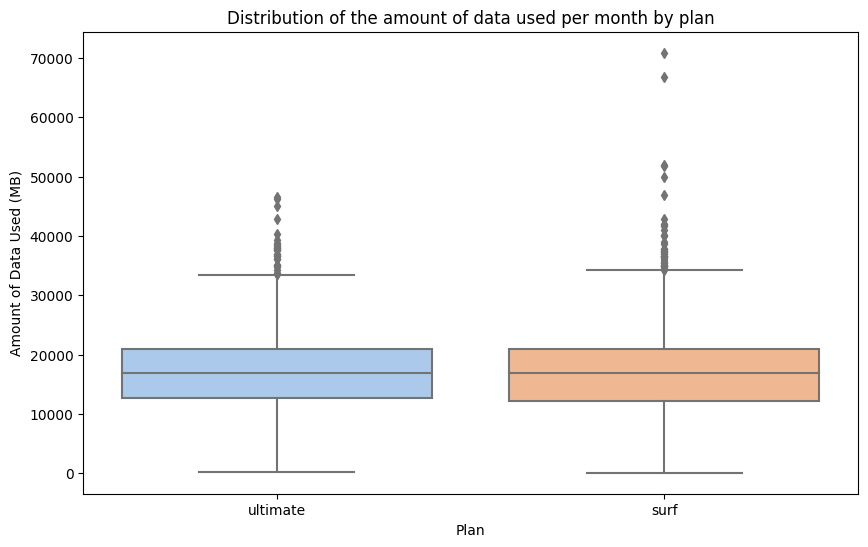

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_data_used, x='plan', y='total_mb_used', palette='pastel')
plt.title('Distribution of the amount of data used per month by plan')
plt.xlabel('Plan')
plt.ylabel('Amount of Data Used (MB)')
plt.show()

La gráfica de cajas y bigotes exponen la distribución mensual con respecto a la cantidad de MB para ambos planes.

Se puede observar que la media es bastante similar en ambas, la diferencia es bastante baja.

Con respecto a la distribución de los datos, se puede entender que no tiene una distribución normal dado a los outliers que ambos presentan. Surf posee outliers mucho más alejados del cuartil.

## Ingreso

In [44]:
# Calcular ganancia mensual por llamada

monthly_calls = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
monthly_calls = monthly_calls.merge(users, on='user_id', how='left')
monthly_calls['extra_minutes'] = monthly_calls.apply(
    lambda row: max(0, row['duration'] - plans.loc[plans['plan_name'] == row['plan'], 'minutes_included'].values[0]), axis=1)
monthly_calls['call_income'] = monthly_calls.apply(
    lambda row: row['extra_minutes'] * plans.loc[plans['plan_name'] == row['plan'], 'usd_per_minute'].values[0], axis=1)

display(monthly_calls)

,user_id,month,duration,first_name,last_name,age,city,reg_date,plan,churn_date,extra_minutes,call_income
0,1000,12,124,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,0.0
1,1001,8,182,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.0
2,1001,9,315,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.0
3,1001,10,393,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.0
4,1001,11,426,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,339,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,0,0.0
2254,1499,9,346,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,0,0.0
2255,1499,10,385,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,0,0.0
2256,1499,11,308,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,0,0.0


In [45]:
#  Calcular ganancia mensual por mensajes

monthly_messages = messages.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id': 'total_messages'})
monthly_messages = monthly_messages.merge(users, on='user_id', how='left')
monthly_messages['extra_messages'] = monthly_messages.apply(
    lambda row: max(0, row['total_messages'] - plans.loc[plans['plan_name'] == row['plan'], 'messages_included'].values[0]), axis=1)
monthly_messages['message_income'] = monthly_messages.apply(
    lambda row: row['extra_messages'] * plans.loc[plans['plan_name'] == row['plan'], 'usd_per_message'].values[0], axis=1)

display(monthly_messages)

,user_id,month,total_messages,first_name,last_name,age,city,reg_date,plan,churn_date,extra_messages,message_income
0,1000,12,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,0.00
1,1001,8,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.00
2,1001,9,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.00
3,1001,10,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,3,0.09
4,1001,11,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1801,1496,9,21,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0,0.00
1802,1496,10,18,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0,0.00
1803,1496,11,13,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0,0.00
1804,1496,12,11,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0,0.00


In [46]:
#  Calcular ganancia mensual por internet

monthly_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
monthly_internet = monthly_internet.merge(users, on='user_id', how='left')
monthly_internet['extra_mb'] = monthly_internet.apply(
    lambda row: max(0, row['mb_used'] - plans.loc[plans['plan_name'] == row['plan'], 'mb_per_month_included'].values[0]), axis=1)

display(monthly_internet)

,user_id,month,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,extra_mb
0,1000,12,1899,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0
1,1001,8,6908,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
2,1001,9,13294,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
3,1001,10,22308,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,6948
4,1001,11,18477,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,3117
...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,12,23106,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,7746
2273,1499,9,12967,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,0
2274,1499,10,19465,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,4105
2275,1499,11,16793,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1433


In [47]:
# Calcular ganancia de MB extra usados

monthly_internet['internet_income'] = monthly_internet.apply(
    lambda row: np.ceil(row['extra_mb'] / 1024) * plans.loc[plans['plan_name'] == row['plan'], 'usd_per_gb'].values[0], axis=1)

display(monthly_internet)

,user_id,month,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,extra_mb,internet_income
0,1000,12,1899,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,0.0
1,1001,8,6908,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.0
2,1001,9,13294,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,0.0
3,1001,10,22308,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,6948,70.0
4,1001,11,18477,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,3117,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,12,23106,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,7746,80.0
2273,1499,9,12967,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,0,0.0
2274,1499,10,19465,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,4105,50.0
2275,1499,11,16793,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1433,20.0


In [54]:
# unir DF para crear monthly_income dataframe

monthly_income = monthly_calls.merge(monthly_messages[['user_id', 'month', 'message_income', 'total_messages']], 
                                     on=['user_id', 'month'], how='outer')
monthly_income = monthly_income.merge(monthly_internet[['user_id', 'month', 'internet_income', 'mb_used']], 
                                     on=['user_id', 'month'], how='outer')
monthly_income = monthly_income.fillna(0)

display(monthly_income)

,user_id,month,duration,first_name,last_name,age,city,reg_date,plan,churn_date,extra_minutes,call_income,message_income,total_messages,internet_income,mb_used
0,1000,12,124.0,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,0.0,0.0,0.00,11.0,0.0,1899.0
1,1001,8,182.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.00,30.0,0.0,6908.0
2,1001,9,315.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.00,44.0,0.0,13294.0
3,1001,10,393.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.09,53.0,70.0,22308.0
4,1001,11,426.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.00,36.0,40.0,18477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.33,61.0,0.0,13027.0
2289,1361,5,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.00,2.0,0.0,1516.0
2290,1482,10,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.00,2.0,0.0,0.0
2291,1108,12,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.00,0.0,0.0,233.0


In [49]:
#Calcular total de ingresos mensuales para cada usuario

monthly_income['total_income'] = monthly_income['call_income'] + monthly_income['message_income'] + monthly_income['internet_income']
display(monthly_income)

,user_id,month,duration,first_name,last_name,age,city,reg_date,plan,churn_date,extra_minutes,call_income,message_income,total_messages,internet_income,mb_used,total_income
0,1000,12,124.0,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,0.0,0.0,0.00,11.0,0.0,1899.0,0.00
1,1001,8,182.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.00,30.0,0.0,6908.0,0.00
2,1001,9,315.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.00,44.0,0.0,13294.0,0.00
3,1001,10,393.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.09,53.0,70.0,22308.0,70.09
4,1001,11,426.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0.0,0.0,0.00,36.0,40.0,18477.0,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.33,61.0,0.0,13027.0,0.33
2289,1361,5,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.00,2.0,0.0,1516.0,0.00
2290,1482,10,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.00,2.0,0.0,0.0,0.00
2291,1108,12,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.00,0.0,0.0,233.0,0.00


In [ ]:
### Visualización y estadística descriptiva para los ingresos: ###

# Calcular estadística descriptiva para ganancias mensuales para ambos planes (Surf & Ultimate) 

income_stats_surf = monthly_income[monthly_income['plan'] == 'surf']['total_income'].describe()
income_stats_ultimate = monthly_income[monthly_income['plan'] == 'ultimate']['total_income'].describe()

# Calcular varianza y cuartiles.

income_stats_surf['variance'] = monthly_income[monthly_income['plan'] == 'surf']['total_income'].var()
income_stats_surf['IQR'] = income_stats_surf['75%'] - income_stats_surf['25%']
income_stats_ultimate['variance'] = monthly_income[monthly_income['plan'] == 'ultimate']['total_income'].var()
income_stats_ultimate['IQR'] = income_stats_ultimate['75%'] - income_stats_ultimate['25%']

income_stats = pd.DataFrame({'Surf': income_stats_surf, 'Ultimate': income_stats_ultimate})


display(income_stats)


,Surf,Ultimate
count,1545.000000,713.000000
mean,39.989592,2.258065
std,53.387874,11.282912
min,0.000000,0.000000
25%,0.000000,0.000000
50%,20.360000,0.000000
75%,60.210000,0.000000
max,570.370000,112.000000
variance,2850.265065,127.304096
IQR,60.210000,0.000000


1. Los ingresos son mayores en el plan Surf, pues muestra una mayor tendencia de consumo una vez se consume los servicios básicos del plan. Para el plan Utimate, el consumo muestra mantener los límites ya que lo que se excede no es realmente elevado con respecto a los servicios básicos del plan.
2. Existe una concentración importante para ingresos $0. Eso significa que son muchos los usuarios que simplemente consumen (o no alcanzan a consumir) todos los servicios que constituyen los planes.
3. La distribución de Surf es amplia y variada (Diferentes cargos adicionales). Para Ultimate, la distribución se centra principalmente en clientes que no tienen gastos extra más alla del costo mensual del plan.

## Prueba las hipótesis estadísticas

Ho: Ingreso promedio de los usuarios en NY-NJ es igual al ingreso de las otras ciudades

Hi: Ingreso promedio de los usuarios en NY-NJ es diferente al ingreso de las otras ciudades

alpha: 0.05

In [224]:
# 1. Calcular mensajes mensuales por usuario
monthly_messages = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
monthly_messages = monthly_messages.rename(columns={'id': 'total_messages'})

# 2. Añadir información del plan desde la tabla de usuarios
monthly_messages = monthly_messages.merge(users[['user_id', 'plan']], on='user_id', how='left')

# 3. Calcular mensajes extra (más allá de los incluidos en el plan)
extra_messages = []
for _, row in monthly_messages.iterrows():
    plan_name = row['plan']
    total = row['total_messages']
    included = plans.loc[plans['plan_name'] == plan_name, 'messages_included'].values[0]
    extra = max(0, total - included)
    extra_messages.append(extra)

monthly_messages['extra_messages'] = extra_messages

# 4. Calcular ingreso por mensajes
message_income = []
for _, row in monthly_messages.iterrows():
    plan_name = row['plan']
    price_per_message = plans.loc[plans['plan_name'] == plan_name, 'usd_per_message'].values[0]
    income = row['extra_messages'] * price_per_message
    message_income.append(income)

monthly_messages['message_income'] = message_income
# 5. Calcular uso mensual de internet por usuario
monthly_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
monthly_internet = monthly_internet.merge(users[['user_id', 'plan']], on='user_id', how='left')

# 6. Calcular megas extra
extra_mb = []
for _, row in monthly_internet.iterrows():
    plan_name = row['plan']
    total_mb = row['mb_used']
    included_mb = plans.loc[plans['plan_name'] == plan_name, 'mb_per_month_included'].values[0]
    extra = max(0, total_mb - included_mb)
    extra_mb.append(extra)

monthly_internet['extra_mb'] = extra_mb

# 7. Calcular ingreso por internet (en GB redondeado)
internet_income = []
for _, row in monthly_internet.iterrows():
    plan_name = row['plan']
    usd_per_gb = plans.loc[plans['plan_name'] == plan_name, 'usd_per_gb'].values[0]
    extra_gb = np.ceil(row['extra_mb'] / 1024)
    income = extra_gb * usd_per_gb
    internet_income.append(income)

monthly_internet['internet_income'] = internet_income

# 8. Unir ingresos de llamadas, mensajes e internet
monthly_income = monthly_calls.merge(
    monthly_messages[['user_id', 'month', 'message_income']],
    on=['user_id', 'month'], how='outer'
)

monthly_income = monthly_income.merge(
    monthly_internet[['user_id', 'month', 'internet_income']],
    on=['user_id', 'month'], how='outer'
)

# 9. Reemplazar valores nulos por 0
monthly_income = monthly_income.fillna(0)

# 10. Calcular ingreso total mensual
monthly_income['total_income'] = (
    monthly_income['call_income']
    + monthly_income['message_income']
    + monthly_income['internet_income']
)

# 11. Separar ingresos por plan
surf_income = monthly_income[monthly_income['plan'] == 'surf']['total_income']
ultimate_income = monthly_income[monthly_income['plan'] == 'ultimate']['total_income']

# Test de Levene
levene_stat, levene_p = st.levene(surf_income, ultimate_income)

print(f"\nTest de Levene:")
print(f"Estadístico: {levene_stat:.4f}")
print(f"Valor p: {levene_p:.4f}")

if levene_p < alpha:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales.")
    print("Se debe usar una prueba t con `equal_var=False`.")
else:
    print("No rechazamos la hipótesis nula: las varianzas son similares.")
    print("Se puede usar la prueba t con `equal_var=True`.")
    
# 12. Prueba t de dos muestras
alpha = 0.05
t_stat_1, p_value_1 = st.ttest_ind(surf_income, ultimate_income)

print("Valor p:", p_value_1)

if p_value_1 < alpha:
    print(f"Valor p: {p_value_1:} < α = {alpha} → Rechazamos la hipótesis nula")
    print("Existe una diferencia significativa en los ingresos mensuales entre los planes.")
else:
    print(f"Valor p: {p_value_1:} ≥ α = {alpha} → No rechazamos la hipótesis nula")
    print("No hay evidencia suficiente para afirmar que los ingresos mensuales difieren entre los planes.")



Test de Levene:
Estadístico: 422.6807
Valor p: 0.0000
Rechazamos la hipótesis nula: las varianzas no son iguales.
Se debe usar una prueba t con `equal_var=False`.
Valor p: 1.5266447219108552e-72
Valor p: 1.5266447219108552e-72 < α = 0.05 → Rechazamos la hipótesis nula
Existe una diferencia significativa en los ingresos mensuales entre los planes.


In [ ]:
ny_nj_income = monthly_income[monthly_income['city'].str.contains("NY-NJ", case=False, na=False)]['total_income']
other_regions_income = monthly_income[~monthly_income['city'].str.contains("NY-NJ", case=False, na=False)]['total_income']

# t-test para 2 muestras
t_stat_2, p_value_2 = st.ttest_ind(ny_nj_income, other_regions_income)
p_value_2 # Prueba las hipótesis



0.4876246154923213

Cómo p_valor < alpha, no se rechaza la hipótesis nula.

Los ingresos no son diferentes entre NY-NJ con respecto a las otras ciudades.

## Conclusión general

**CONCLUSIONES A NIVEL DE PROYECTO:**

1. Data wrangling: Datos modificados con base a las fechas. Las llamadas que equivalian a 0, se pueden catalogar como "llamadas perdidas".
2. Visualización de datos: Las visualizaciones de cajas y bigotes, histogramas y de barras, se pudo apreciar como surf mostraba un mayor consumo, distribución y outliers con respecto a los usuarios y los meses. Ultimate es bastante un movimiento "conservador" con respecto al consumo de los clientes que tienen este plan.
3. Analisis de ingresos: Se pareció una variabilidad bastante significativa entre los planes. Cómo se ha mencionado en varias ocasiones, Surf es el plan que mayor movimiento tiene, lo que se traduce como el plan que mayor varianza posee generando mayores ganancias.
4. Pruebas de hipótesis: Se determina, por medio de los resultados, que existe una diferencia signicativa entre los usuarios pertenecientes a cada plan. No se demostró alguna diferencia con respecto a las zonas con respecto a los ingresos.

**CONCLUSIONES GENERALES:**

Se pudo apreciar diferencias entre los planes y los movimientos/comportamientos de los usuarios con respecto al consumo del plan y el consumo extra lo cual puede llevar a mejorar la toma de decisiones para el área de pricing y marketing de la empresa.

Lo que se puede asumir es que se puede generar un impulso de marca importante por medio de las tarifas, principalmente en los servicios extra obtenidos por los usuarios.

Generar ofertas, promociones, descuentos o planes enfocados al consumo post plan, podría mejorar las ventas y la estandarización del consumo.